<a href="https://colab.research.google.com/github/profliuhao/CSIT553/blob/main/CSIT553_color_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

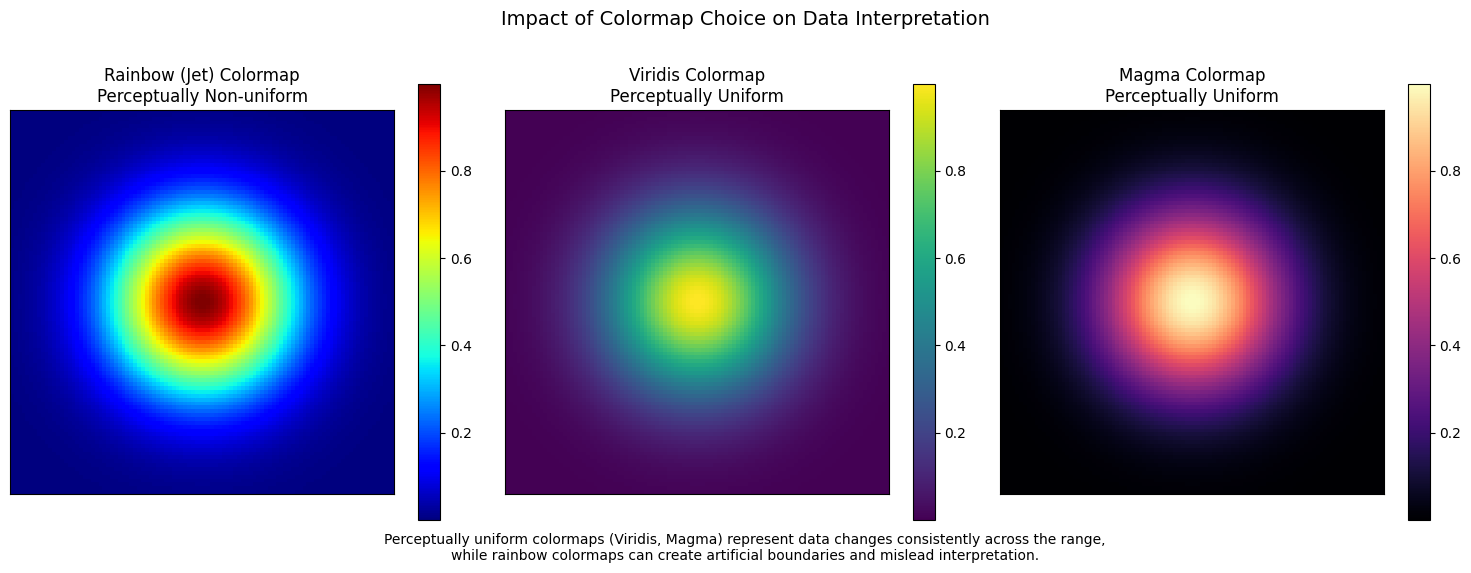

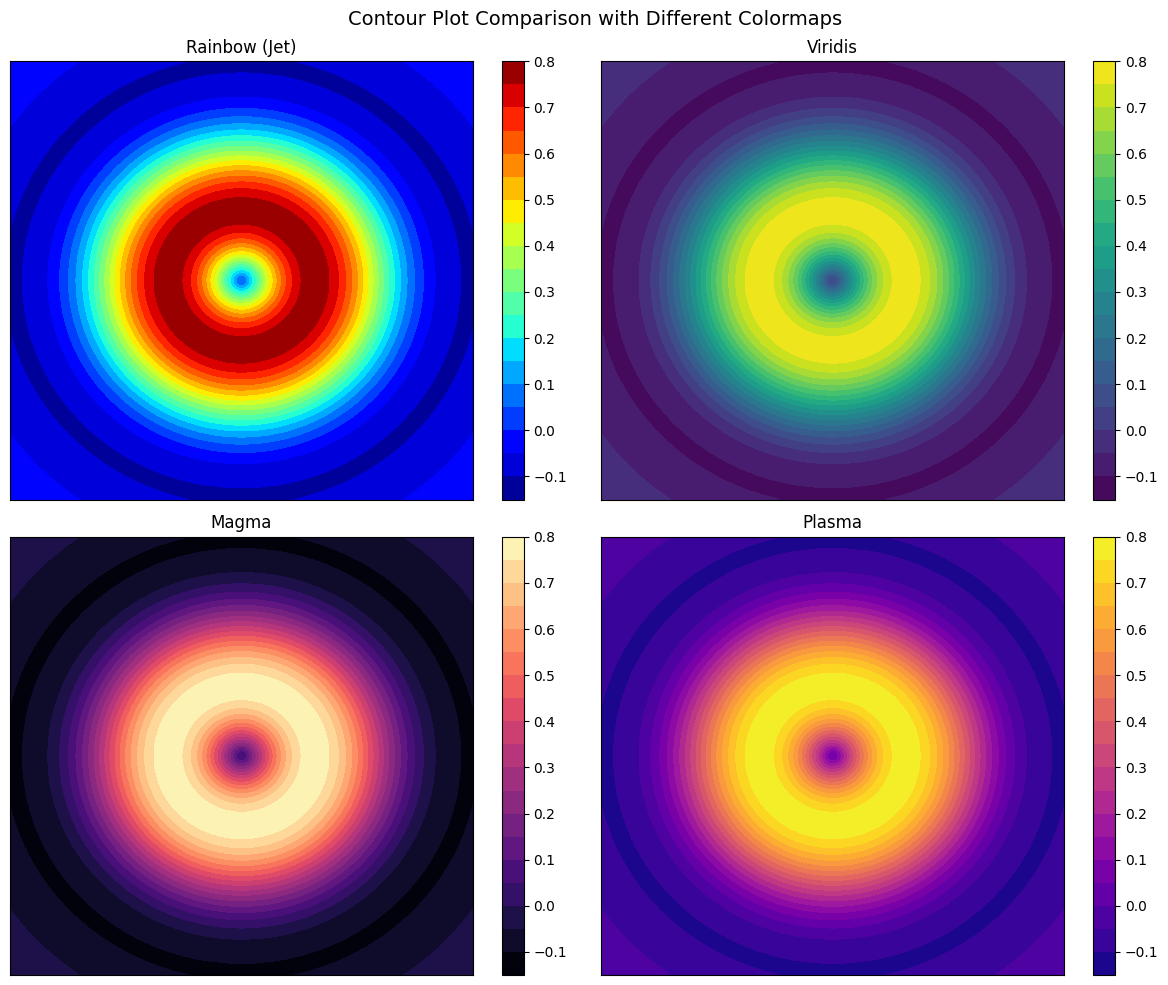

In [ ]:
# Create sample data: a 2D Gaussian distribution
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2)/2) # 2D Gaussian

# Create the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Impact of Colormap Choice on Data Interpretation', fontsize=14, y=1.05)

# Plot 1: Rainbow colormap (potentially misleading)
rainbow = axes[0].imshow(Z, cmap='jet')
axes[0].set_title('Rainbow (Jet) Colormap\nPerceptually Non-uniform')
plt.colorbar(rainbow, ax=axes[0])
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot 2: Viridis colormap
viridis = axes[1].imshow(Z, cmap='viridis')
axes[1].set_title('Viridis Colormap\nPerceptually Uniform')
plt.colorbar(viridis, ax=axes[1])
axes[1].set_xticks([])
axes[1].set_yticks([])

# Plot 3: Magma colormap
magma = axes[2].imshow(Z, cmap='magma')
axes[2].set_title('Magma Colormap\nPerceptually Uniform')
plt.colorbar(magma, ax=axes[2])
axes[2].set_xticks([])
axes[2].set_yticks([])

# Add explanatory text
fig.text(0.5, -0.05,
         'Perceptually uniform colormaps (Viridis, Magma) represent data changes consistently across the range,\n' +
         'while rainbow colormaps can create artificial boundaries and mislead interpretation.',
         ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Now let's create a second figure showing how different colormaps affect
# the perception of the same data in a contour plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Contour Plot Comparison with Different Colormaps', fontsize=14)

# Create more complex data for contour demonstration
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) * np.exp(-(X**2 + Y**2)/8)

colormaps = ['jet', 'viridis', 'magma', 'plasma']
titles = ['Rainbow (Jet)', 'Viridis', 'Magma', 'Plasma']

for ax, cmap, title in zip(axes.flat, colormaps, titles):
    contour = ax.contourf(X, Y, Z, levels=20, cmap=cmap)
    ax.set_title(title)
    plt.colorbar(contour, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

<ipython-input-40-a84c71281255>:31: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states['population_density'] = states['population_density'] * (states.area / states.area.mean())


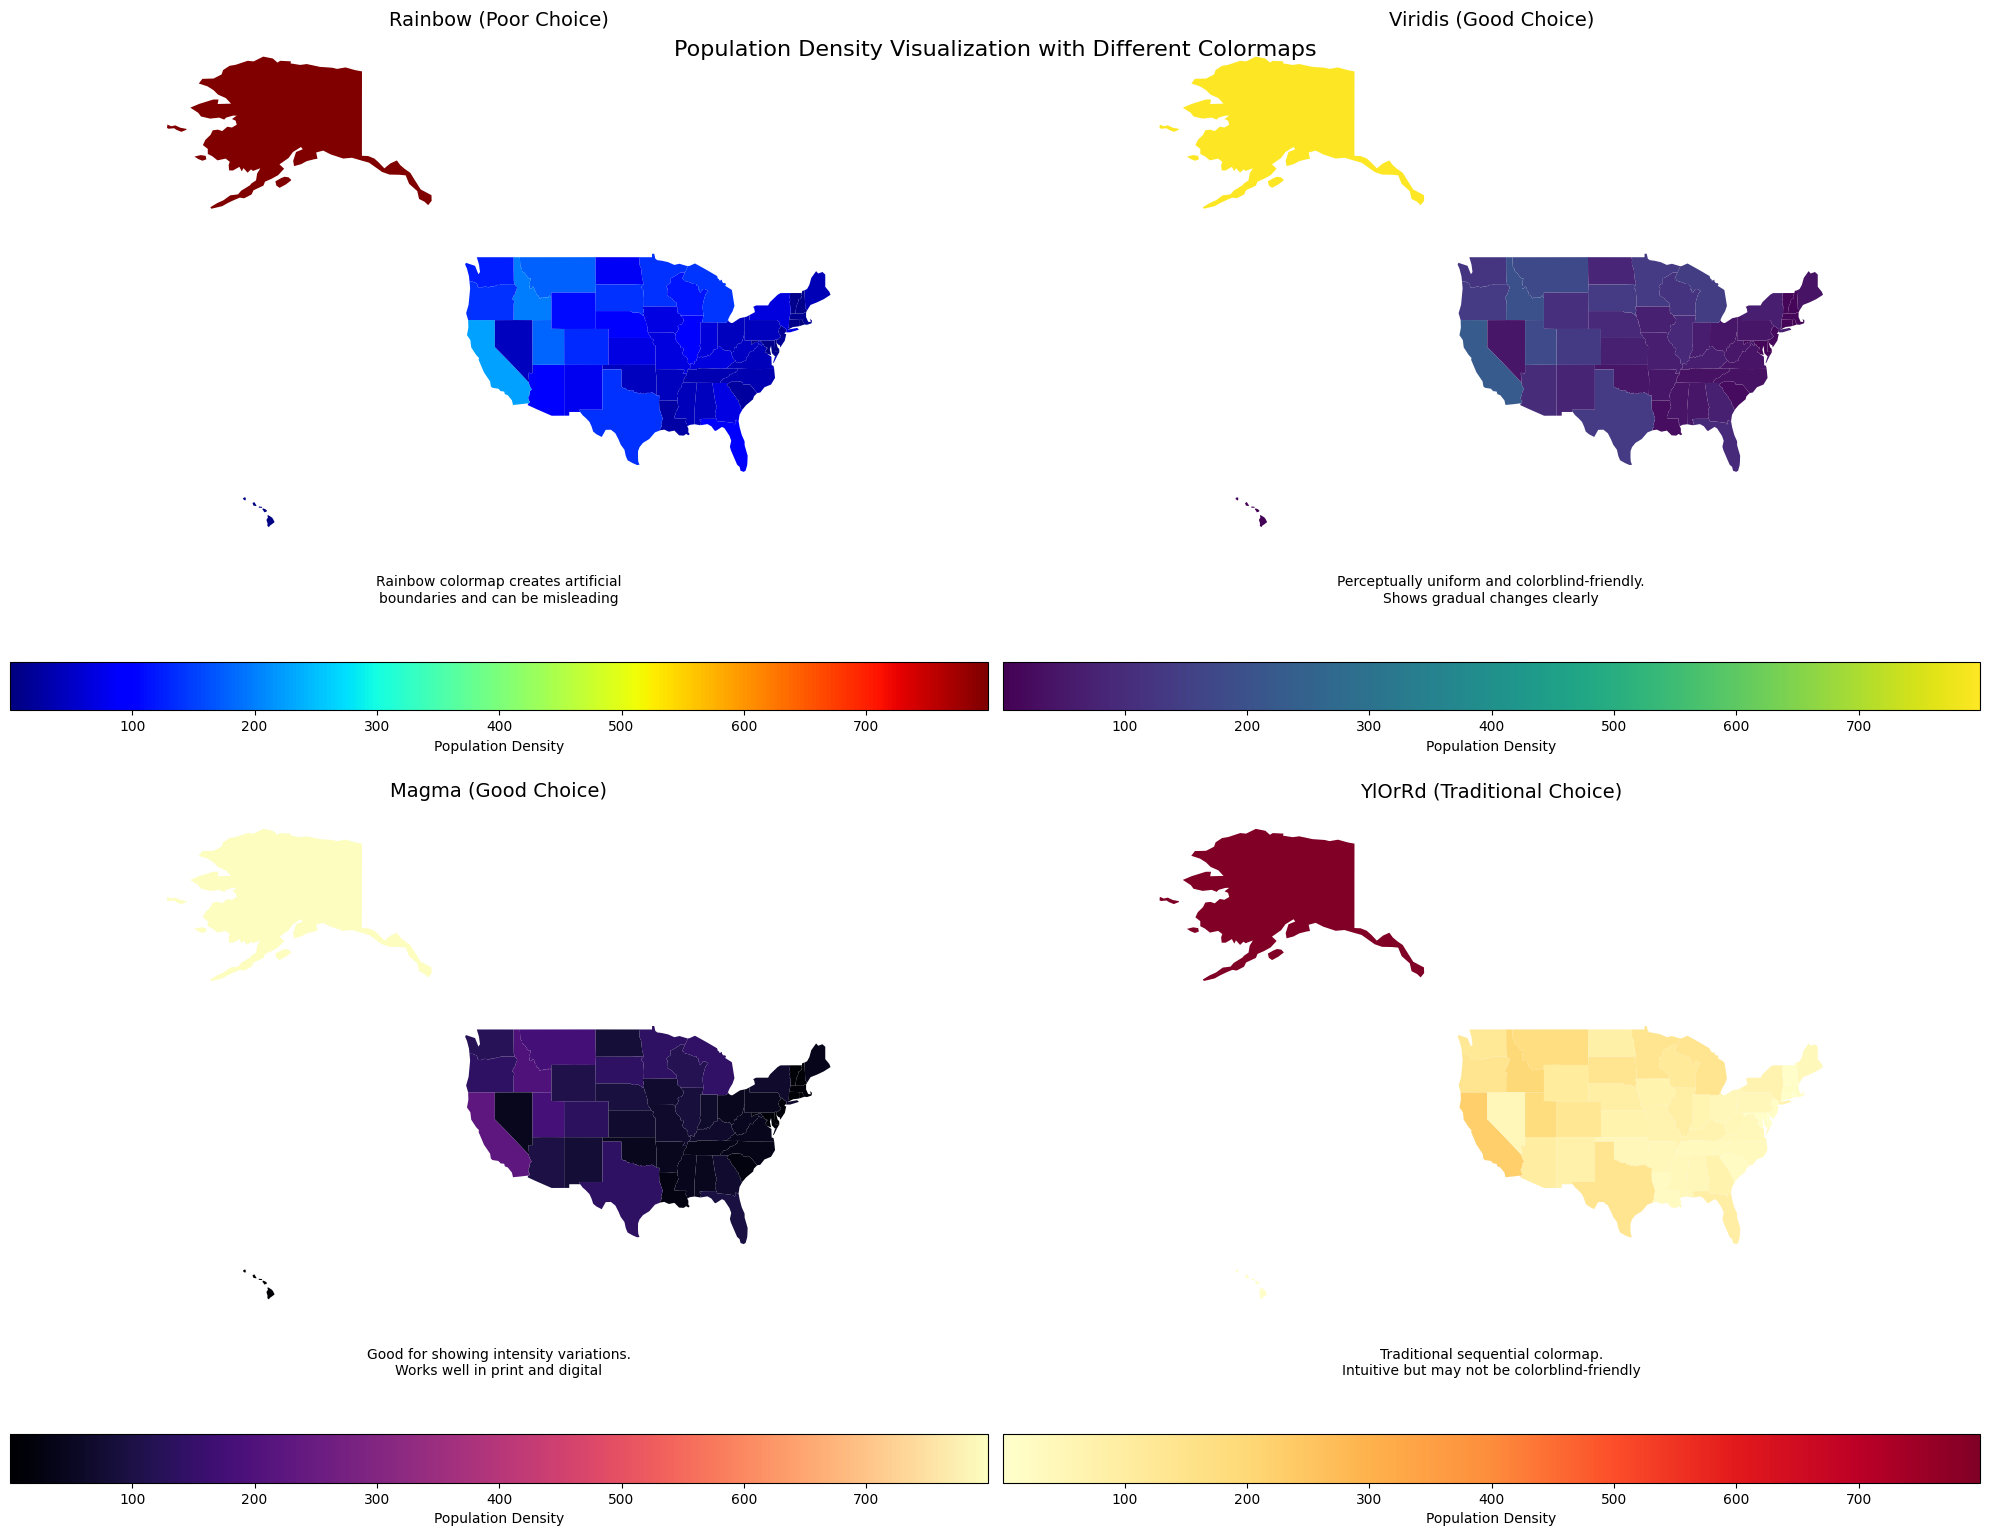

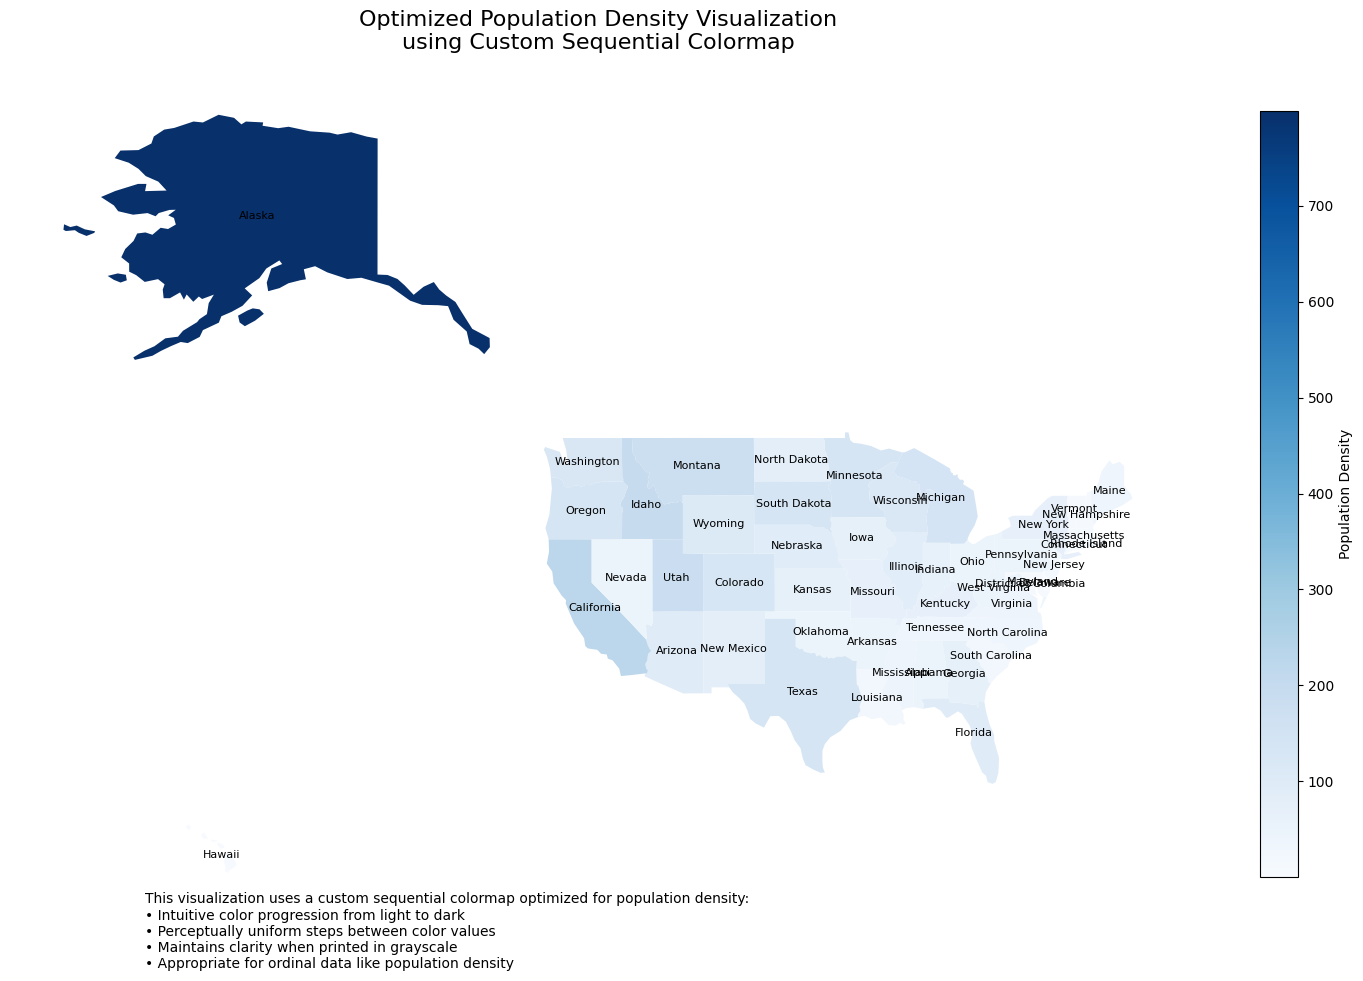

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load US states geometry and population data
# Download and process shapefile
print("Downloading geographic data...")
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_1_states_provinces.geojson"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    states_gdf = gpd.read_file(io.StringIO(response.content.decode('utf-8')))
    states_gdf = states_gdf[states_gdf['admin'] == 'United States of America']

else:
    raise requests.RequestException(
        f"Failed to download geographic data. Status code: {response.status_code}"
    )
states = states_gdf

# Create synthetic population density data (for demonstration)
# In real application, you would load actual census data
np.random.seed(42)
states['population_density'] = np.random.gamma(5, scale=20, size=len(states))
states['population_density'] = states['population_density'] * (states.area / states.area.mean())

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Population Density Visualization with Different Colormaps', fontsize=16, y=0.95)

# Different colormaps to compare
cmaps = ['jet', 'viridis', 'magma', 'YlOrRd']
titles = ['Rainbow (Poor Choice)', 'Viridis (Good Choice)',
         'Magma (Good Choice)', 'YlOrRd (Traditional Choice)']

for ax, cmap, title in zip(axes.flat, cmaps, titles):
    # Plot the map
    states.plot(column='population_density',
               cmap=cmap,
               legend=True,
               legend_kwds={'label': 'Population Density',
                          'orientation': 'horizontal'},
               ax=ax)

    # Customize the appearance
    ax.set_title(title, fontsize=14)
    ax.axis('off')

    # Add text explaining the implications of this colormap
    if cmap == 'jet':
        ax.text(0.5, -0.1,
                'Rainbow colormap creates artificial\nboundaries and can be misleading',
                transform=ax.transAxes, ha='center', fontsize=10)
    elif cmap == 'viridis':
        ax.text(0.5, -0.1,
                'Perceptually uniform and colorblind-friendly.\nShows gradual changes clearly',
                transform=ax.transAxes, ha='center', fontsize=10)
    elif cmap == 'magma':
        ax.text(0.5, -0.1,
                'Good for showing intensity variations.\nWorks well in print and digital',
                transform=ax.transAxes, ha='center', fontsize=10)
    else:
        ax.text(0.5, -0.1,
                'Traditional sequential colormap.\nIntuitive but may not be colorblind-friendly',
                transform=ax.transAxes, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Now let's create a more detailed single map with a better colormap
# and additional features for optimal visualization
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a custom colormap that's optimized for population density
colors = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b']
n_bins = 256
custom_cmap = LinearSegmentedColormap.from_list('custom_blues', colors, N=n_bins)

# Plot with the custom colormap
states.plot(column='population_density',
           cmap=custom_cmap,
           legend=True,
           legend_kwds={'label': 'Population Density',
                      'orientation': 'vertical',
                      'shrink': 0.8},
           ax=ax)

# Add state labels for reference
for idx, row in states.iterrows():
    ax.annotate(text=row['name'],
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                ha='center', va='center',
                fontsize=8)

ax.set_title('Optimized Population Density Visualization\nusing Custom Sequential Colormap',
             fontsize=16, pad=20)
ax.axis('off')

# Add explanatory text
fig.text(0.1, 0.02,
         'This visualization uses a custom sequential colormap optimized for population density:\n' +
         '• Intuitive color progression from light to dark\n' +
         '• Perceptually uniform steps between color values\n' +
         '• Maintains clarity when printed in grayscale\n' +
         '• Appropriate for ordinal data like population density',
         fontsize=10, ha='left')

plt.tight_layout()
plt.show()

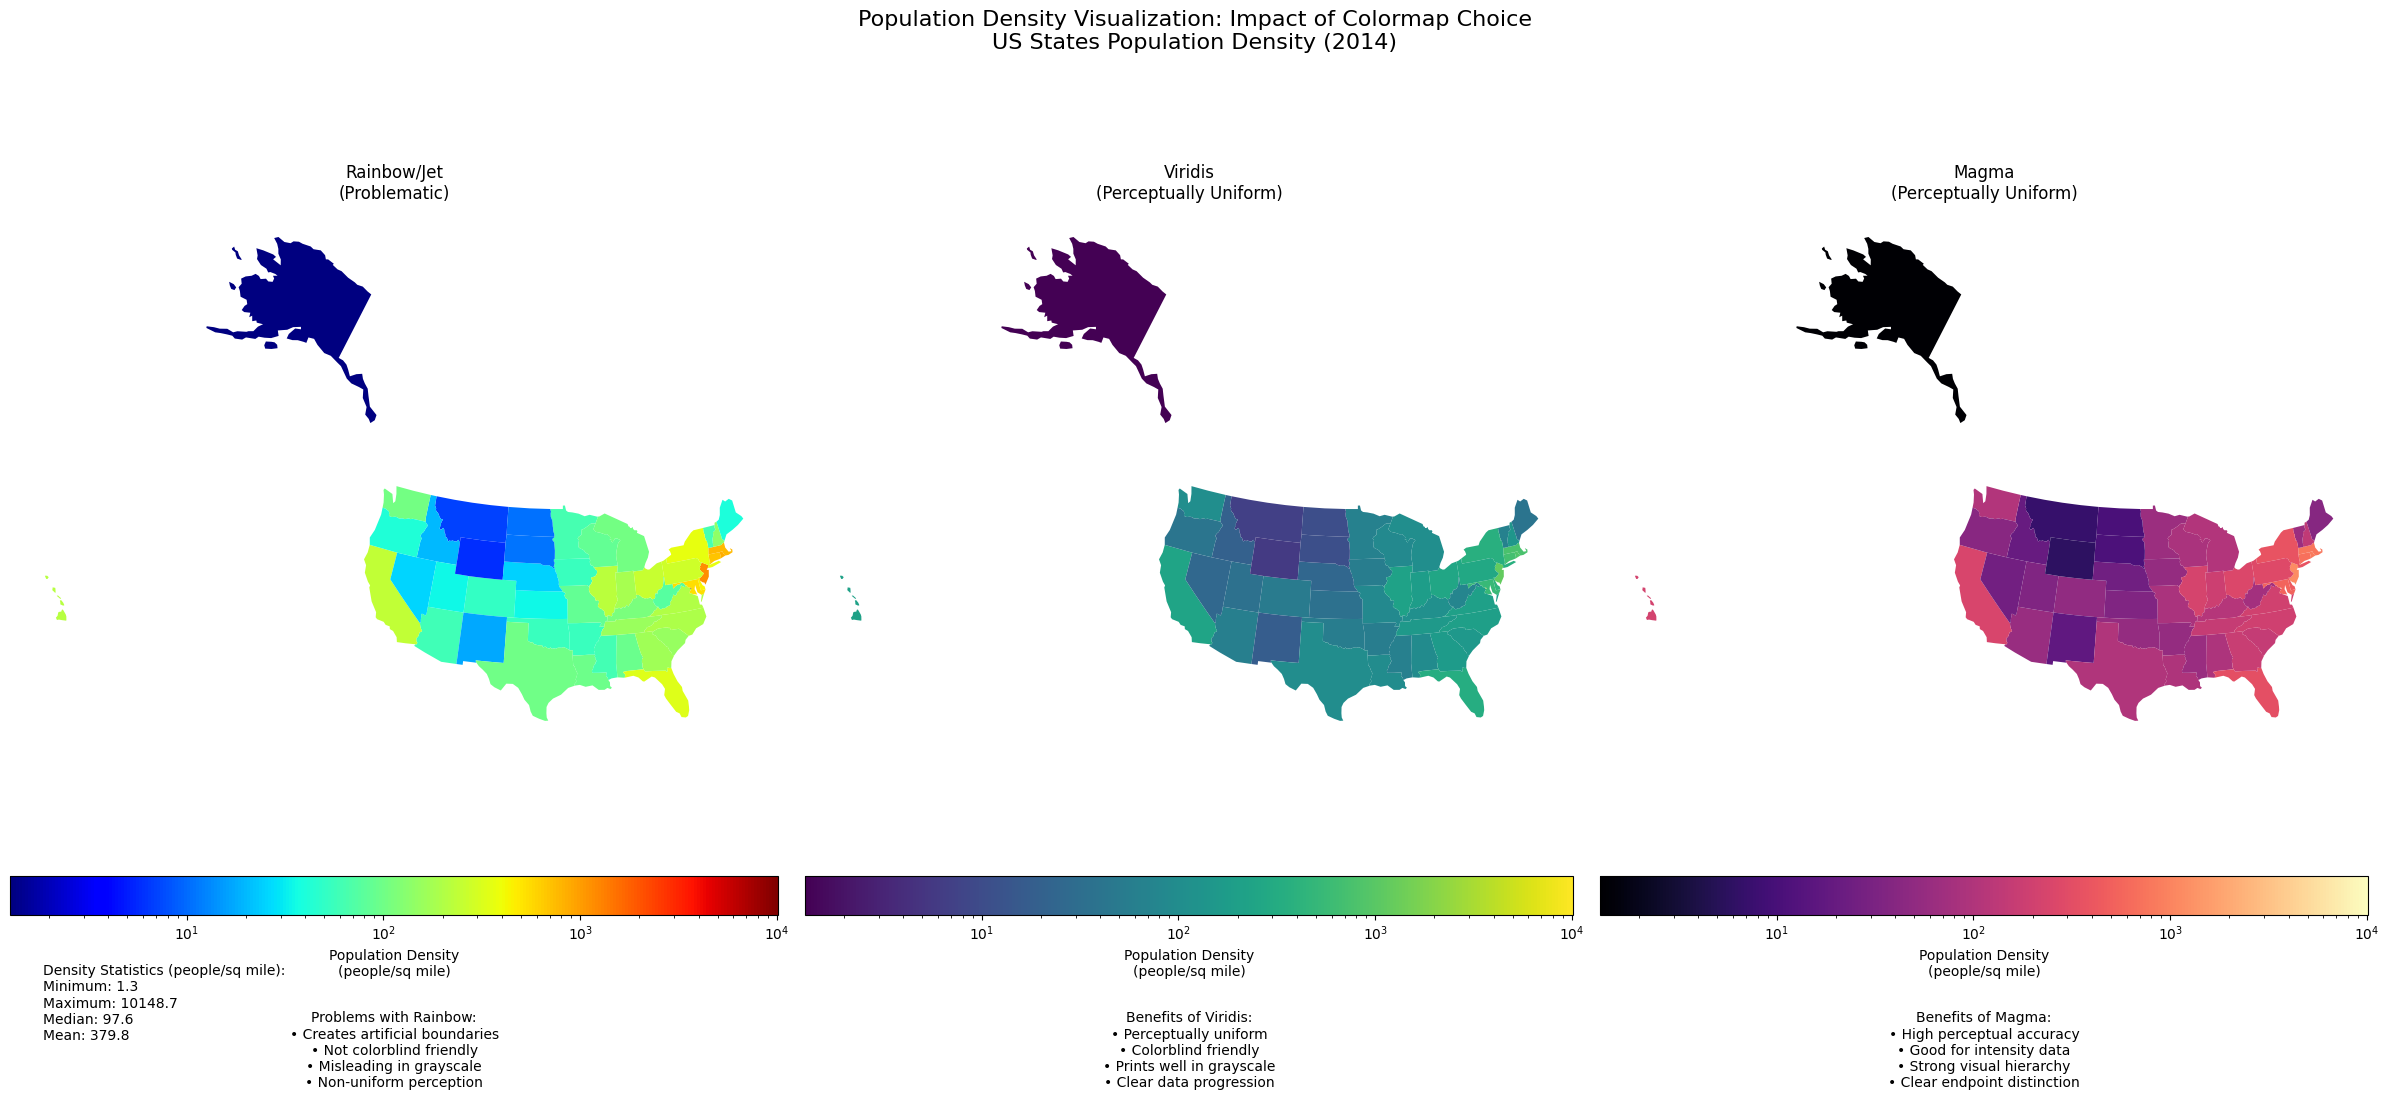

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize, LogNorm
import requests
import io
import sys
import matplotlib.colors as mcolors

def get_population_data():
    """
    Get 2014 population data from GitHub
    """
    print("Downloading population data...")
    pop_url = "https://gist.githubusercontent.com/bradoyler/0fd473541083cfa9ea6b5da57b08461c/raw/fa5f59ff1ce7ad9ff792e223b9ac05c564b7c0fe/us-state-populations.csv"
    population_df = pd.read_csv(pop_url)
    population_df['state'] = population_df['state']
    population_df['population'] = population_df['pop_2014']
    return population_df

def create_colormap_comparison(states_gdf, pop_df):
    """
    Create visualizations comparing rainbow (jet) with perceptually uniform colormaps
    """
    # Merge data and calculate density
    states_gdf = states_gdf.merge(pop_df[['state', 'population']],
                                 left_on='name',
                                 right_on='state')

    # Project to Albers Equal Area projection
    states_gdf = states_gdf.to_crs('EPSG:5070')

    # Calculate density
    states_gdf['area_sqmi'] = states_gdf.geometry.area / 2589988.11
    states_gdf['density'] = states_gdf['population'] / states_gdf['area_sqmi']

    # Create figure
    fig, axes = plt.subplots(1, 3, figsize=(24, 10))
    fig.suptitle('Population Density Visualization: Impact of Colormap Choice\nUS States Population Density (2014)',
                fontsize=16, y=1.05)

    # Use log normalization to better show the range of values
    norm = LogNorm(vmin=states_gdf['density'].min(),
                  vmax=states_gdf['density'].max())

    # Compare three colormaps
    cmaps = cmaps = ['jet', 'viridis', 'magma']
    titles = ['Rainbow/Jet\n(Problematic)',
             'Viridis\n(Perceptually Uniform)',
             'Magma\n(Perceptually Uniform)']

    for ax, cmap, title in zip(axes, cmaps, titles):
        states_gdf.plot(column='density',
                       cmap=cmap,
                       norm=norm,
                       legend=True,
                       legend_kwds={'label': 'Population Density\n(people/sq mile)',
                                  'orientation': 'horizontal'},
                       ax=ax)

        ax.set_title(title, fontsize=12, pad=10)
        ax.axis('off')

        # Add explanatory text for each colormap
        if cmap == 'jet':
            problems = (
                "Problems with Rainbow:\n"
                "• Creates artificial boundaries\n"
                "• Not colorblind friendly\n"
                "• Misleading in grayscale\n"
                "• Non-uniform perception"
            )
            ax.text(0.5, -0.5, problems, transform=ax.transAxes,
                   ha='center', va='top', fontsize=10)
        elif cmap == 'viridis':
            benefits = (
                "Benefits of Viridis:\n"
                "• Perceptually uniform\n"
                "• Colorblind friendly\n"
                "• Prints well in grayscale\n"
                "• Clear data progression"
            )
            ax.text(0.5, -0.5, benefits, transform=ax.transAxes,
                   ha='center', va='top', fontsize=10)
        else:  # magma
            benefits = (
                "Benefits of Magma:\n"
                "• High perceptual accuracy\n"
                "• Good for intensity data\n"
                "• Strong visual hierarchy\n"
                "• Clear endpoint distinction"
            )
            ax.text(0.5, -0.5, benefits, transform=ax.transAxes,
                   ha='center', va='top', fontsize=10)

    # Add density statistics
    stats_text = (
        f"Density Statistics (people/sq mile):\n"
        f"Minimum: {states_gdf['density'].min():.1f}\n"
        f"Maximum: {states_gdf['density'].max():.1f}\n"
        f"Median: {states_gdf['density'].median():.1f}\n"
        f"Mean: {states_gdf['density'].mean():.1f}"
    )
    fig.text(0.02, 0.02, stats_text, fontsize=10, ha='left')

    plt.tight_layout()
    plt.show()



def main():
    try:
        # Get population data
        pop_df = get_population_data()

        # Download and process shapefile
        print("Downloading geographic data...")
        url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_1_states_provinces.geojson"
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }

        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            states_gdf = gpd.read_file(io.StringIO(response.content.decode('utf-8')))
            states_gdf = states_gdf[states_gdf['admin'] == 'United States of America']

            # Create visualizations
            create_colormap_comparison(states_gdf, pop_df)

        else:
            raise requests.RequestException(
                f"Failed to download geographic data. Status code: {response.status_code}"
            )

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        sys.exit(1)

if __name__ == "__main__":
    main()